In [142]:
import pandas as pd
import emoji
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer
import pos_neg
from collections import Counter
import matplotlib.pyplot as plt


In [143]:
lemmatizer = WordNetLemmatizer()

In [144]:
df = pd.read_csv('./tweets.csv')

In [145]:
df.head()

,author_name,created_at,handle,likes,retweets,tweet_content
0,Naval,2019-08-07 22:36:56,naval,7566,1498,"Unresolved thoughts, prematurely pushed out of..."
1,Naval,2019-08-07 05:00:38,naval,21886,5984,The modern mind is overstimulated and the mode...
2,Naval,2019-08-07 04:52:33,naval,6462,1266,The Lindy Effect for startups:\n\nThe longer y...
3,Naval,2019-08-06 08:35:26,naval,466,61,@orangebook_ This was a good tweet.
4,Naval,2019-08-06 07:33:20,naval,3971,906,Social media lowers the cost of raising &amp; ...


In [146]:
df.created_at = pd.to_datetime(df.created_at)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31115 entries, 0 to 31114
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   author_name    31114 non-null  object        
 1   created_at     31115 non-null  datetime64[ns]
 2   handle         31115 non-null  object        
 3   likes          31115 non-null  int64         
 4   retweets       31115 non-null  int64         
 5   tweet_content  30754 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [148]:
# 1 task
df_min_tweet = df.groupby('author_name').apply(lambda x: x[x.tweet_content.str.len() \
                                                           == x.tweet_content.str.len().min()])

# Delete tweets with one word
df_min_tweet =  df_min_tweet[df_min_tweet['tweet_content'].str.len() >= 2]
df_min_tweet.drop(['author_name'], axis=1)

,,created_at,handle,likes,retweets,tweet_content
author_name,,,,,,
#JeSuisAramco,27899,2018-08-02 00:34:34,ProfJeffJarviss,36,8,Do you practice Mindful Faving
#ᴘᴀᴠᴀɴʀᴇᴅᴅʏ,6983,2019-09-16 21:41:37,reddythepavan,13,2,@AJA_Cortes I ate shitty plants and my thought...
'(Robert Smith),20971,2019-08-25 16:36:25,stylewarning,126,25,"A lecture on the spirit of the computer, recen..."
'*•:Ḟreyjạ:•*',6267,2018-09-13 20:12:02,utotranslucence,178,31,A lot of our problems with trust - in relation...
(((E. Glen Weyl))),11701,2018-09-04 02:03:11,glenweyl,869,250,Couldn't be more excited to put out probably m...
...,...,...,...,...,...,...
🤙🏽 Bobby D 🤟🏽,2098,2019-09-07 13:41:25,BobNotR0b,2729,714,Ben Roethlisberger and Mike Tomlin watching th...
🤯,18832,2019-07-13 03:44:00,krrishd,74,6,@shl obligatory \n
🥚,6258,2019-03-23 16:27:30,designmami,174,20,Admittedly my belief system is a combination o...


In [149]:
# 2 task -- count emoji

emoji_unicode = [c for c in emoji.UNICODE_EMOJI]
list_of_e = []
with open('./tweets.csv', 'r') as csv_f:
    lines = csv_f.read()
    for line in lines:
        for char in line:
            if char in emoji_unicode:
                list_of_e.append(char)

counter_emoji = Counter(list_of_e)
counter_emojis.most_common(10)

"# 2 task -- count emoji\n\nemoji_unicode = [c for c in emoji.UNICODE_EMOJI]\nlist_of_e = []\nwith open('./tweets.csv', 'r') as csv_f:\n    lines = csv_f.read()\n    for line in lines:\n        for char in line:\n            if char in emoji_unicode:\n                list_of_e.append(char)\n\nc = Counter(list_of_e)\nc.most_common(10)"

In [150]:
# Task 3
df['words'] = df.tweet_content.astype(str).apply(lambda x: \
                                                 [lemmatizer.lemmatize(y) for y in re.split('\.|,|:|\n| ', x)])

df['sentiment_score'] = df['words'].apply(lambda x: pd.Series(x).isin(pos_neg.pos_words).sum() \
                                          - pd.Series(x).isin(pos_neg.neg_words).sum())



In [151]:
# Task 4
# df_quantiles where we store tweets with first and last 10% quantiles
quant = df.sentiment_score.quantile([0.1, 0.9]).values
df_quantiles = df[df.sentiment_score.apply(lambda x: x < quant[0] or x > quant[1]) == True]

df_quantiles

,author_name,created_at,handle,likes,retweets,tweet_content,words,sentiment_score
21,Naval,2019-07-09 04:19:28,naval,3099,545,"Spirituality is a luxury good. In olden times,...","[Spirituality, is, a, luxury, good, , In, olde...",3
22,Thought Reps,2019-07-07 13:18:34,ThoughtReps,333,59,“You’re not going to get rich renting out your...,"[“You’re, not, going, to, get, rich, renting, ...",3
78,Naval,2019-05-27 09:55:24,naval,133,24,@rivervalleysea When it comes to technology de...,"[@rivervalleysea, When, it, come, to, technolo...",3
80,Naval,2019-05-27 08:11:05,naval,8754,2135,Modern society will shame you for earning mone...,"[Modern, society, will, shame, you, for, earni...",-3
86,Naval Ravikant Bot,2019-05-23 20:00:55,NavalBot,2282,513,"""The most important trick to be happy is to re...","[""The, most, important, trick, to, be, happy, ...",6
...,...,...,...,...,...,...,...,...
31086,Uncanny Insights,2019-01-03 14:32:04,uncannyinsights,7,0,People who laugh at others weaknesses have no ...,"[People, who, laugh, at, others, weakness, hav...",-6
31088,Uncanny Insights,2019-01-02 12:57:10,uncannyinsights,3,2,Life is much happier and enjoyable in the stat...,"[Life, is, much, happier, and, enjoyable, in, ...",4
31089,Uncanny Insights,2019-01-02 06:12:41,uncannyinsights,51,15,Insecurity is the outcome of fear and fear is ...,"[Insecurity, is, the, outcome, of, fear, and, ...",-3
31096,Uncanny Insights,2018-12-27 14:57:14,uncannyinsights,18,1,If you give a lot of attention to a work the s...,"[If, you, give, a, lot, of, attention, to, a, ...",3


In [152]:
# Task 5
# Top 10 poitive words
c = Counter()
for x in df[df.sentiment_score > 0].words.apply(lambda x: Counter([y for y in x])).values:
    c += x

for w,n in c.copy().items():
    if w not in pos_neg.pos_words:
        c.pop(w)
print(c.most_common(10))

# Top 10 negative words
c2 = Counter()
for x in df[df.sentiment_score < 0].words.apply(lambda x: Counter([y for y in x])).values:
    c2 += x

for w,n in c2.copy().items():
    if w not in pos_neg.neg_words:
        c2.pop(w)
print(c2.most_common(10))

1897
488
6462
1
5643
10432
166
1
1
46136
15
49
16
2
1000
15
40
4
427
564
7859
143
6
2844
169
1523
374
301
1
71
8
171
26
1576
401
104
87
6593
1
47
1
6
4
56
2
5
64
1904
1
98
27
368
27
3
2
13
20
52
11
19
28
9
65
668
169
12
7
182
9
9975
1
5
61
18
1
123
1
1
170
1
13
2770
1
76
15
952
15
15
11
166
389
196
784
212
40
147
24
1137
2
3
322
4
1
2
10
2
1
7
1
193
1
275
75
331
146
21
181
917
6629
3
196
67
1
3
5
27
4
312
1
951
214
3160
738
257
32
231
2
1864
211
861
3
621
366
362
68
111
7
62
21
1369
1
44
26
647
3
2830
2
30
44
783
10
276
199
389
1125
1
54
960
399
23
1
48
84
51
304
110
131
75
3154
283
18
90
24
426
115
12
1059
47
16
48
296
78
344
279
399
28
2421
13
3
27
22
1170
184
6
1
1655
228
45
3
1
141
206
3916
1
67
63
108
105
1
238
82
376
3
44
1
767
36
36
22
196
309
47
5
34
203
9
22
60
12
918
87
14
22
1
4
303
1
6
1
7
39
2
4
8
4
4
306
247
37
6
1
23
1
38
133
67
920
132
1
68
11
8
298
71
21
4
6
6
7
1
260
19
10
27
10
8
2
2
39
875
148
593
63
129
40
193
35
27
1
8
162
9
1
282
1
17
961
119
35
30
2
41
2
6
8
182

5
1
7
7
6
14
1
1
8
3
3
27
29
4
3
46
1
16
2
1
14
11
1
29
1
1
2
1
20
1
4
2
40
15
1
9
17
1
7
1
20
8
5
1
1
1
18
4
1
1
1
1
1
9
6
4
18
1
1
1
1
1
3
4
1
2
1
1
1
5
71
1
4
88
2
36
9
5
3
1
2
1
8
2
42
1
2
9
1
5
1
1
53
9
2
1
2
1
2
9
4
1
49
5
1
3
10
1
5
1
30
1
3
1
1
4
2
2
1
3
172
29
1
1
1
1
1
1
1
12
16
1
1
32
94
6
1
7
8
1
2
5
11
1
1
1
1
8
11
8
1
15
1
1
2
2
1
2
5
2
5
1
15
1
1
1
10
1
9
3
1
10
1
1
2
55
5
21
1
2
1
1
8
10
1
4
2
22
1
2
14
2
24
1
70
14
2
1
1
1
1
2
1
1
1
1
1
1
8
1
41
12
8
1
12
3
13
23
18
27
1
1
5
1
1
1
7
1
17
61
7
9
25
1
1
4
14
1
1
1
1
1
13
9
1
5
13
6
31
1
29
48
15
11
1
35
2
1
1
1
21
1
1
1
126
33
14
3
1
2
6
39
7
5
6
1
1
50
60
5
6
1
7
5
32
37
1
7
14
7
4
1
1
71
1
5
7
23
29
78
4
8
1
7
1
3
2
1
3
3
1
17
4
18
1
1
5
30
26
2
15
6
8
10
17
2
2
29
1
23
24
6
4
5
1
2
3
1
9
1
1
13
2
4
21
1
12
4
40
2
1
1
6
1
1
1
1
5
1
20
15
5
8
1
1
9
24
8
1
1
4
7
2
16
1
1
1
1
5
3
1
6
42
4
2
3
4
11
1
32
3
67
50
5
3
1
14
47
2
1
8
1
2
31
14
25
1
1
1
1
17
1
2
5
1
1
4
8
1
56
28
1
1
8
11
1
48
1
3
11
1
41
63
1
2
11
1
24
1
1
3
3


1
1
3
15
1
14
6
2
8
7
15
1
1
12
2
1
3
3
8
9
1
1
1
8
6
13
1
1
1
5
1
1
6
7
2
13
1
6
1
5
1
11
1
1
4
1
1
11
11
3
8
4
6
6
11
10
1
1
1
3
7
5
2
1
2
2
10
1
1
4
9
4
1
14
1
1
1
1
10
1
10
1
6
1
5
2
20
8
6
2
27
5
1
11
11
5
3
38
1
1
2
5
1
2
14
5
18
1
1
1
1
3
2
1
3
2
1
1
2
3
5
1
4
1
1
4
4
1
1
7
1
6
2
55
1
1
2
1
3
1
1
5
2
5
1
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
7
1
2
3
1
1
1
1
1
1
1
13
3
1
1
1
1
1
20
4
1
27
1
4
22
2
5
1
15
3
12
1
1
1
1
1
1
2
1
9
4
1
6
13
2
9
1
2
2
1
9
1
1
4
1
13
2
1
1
1
1
1
1
1
2
1
7
1
1
1
1
1
1
1
1
2
1
3
2
8
1
1
3
5
2
1
1
2
2
1
24
2
1
1
1
1
5
2
1
2
10
1
1
1
1
1
2
1
3
1
1
1
1
2
3
13
6
9
1
7
3
1
1
1
1
1
6
1
1
1
1
9
5
1
18
3
1
1
3
12
5
1
7
4
1
1
5
1
1
1
1
3
1
1
1
7
11
5
1
11
1
3
2
6
22
5
4
2
12
11
2
1
1
1
4
1
5
1
1
12
1
4
6
2
3
1
1
2
1
11
2
10
9
1
3
1
14
1
2
3
3
1
2
1
1
3
2
2
26
4
12
30
13
1
1
1
23
1
2
1
1
5
3
1
1
2
2
3
3
2
1
1
1
1
2
2
1
24
2
2
1
1
15
1
1
1
1
2
4
6
2
1
1
1
2
1
13
1
1
1
1
1
5
6
3
3
9
1
1
1
4
3
22
11
1
2
3
20
2
7
1
3
1
2
10
1
7
1
3
3
3
2
1
7
1

2
1
1
2
1
1
2
16
2
3
1
1
1
1
1
1
1
1
1
2
2
5
1
1
7
2
1
4
1
3
5
1
1
1
1
1
1
1
1
2
2
1
1
3
2
8
3
1
1
2
2
1
6
1
1
2
1
2
1
6
1
2
1
1
1
2
1
1
2
3
1
1
3
1
3
1
1
1
1
2
2
1
1
1
1
3
4
2
1
1
1
1
7
1
1
2
3
1
8
2
1
1
1
1
2
1
1
2
2
1
1
1
3
1
1
2
1
3
2
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
7
2
4
6
1
1
2
2
2
12
4
1
1
12
1
2
1
1
3
1
1
1
2
1
1
1
1
4
4
1
1
13
1
5
1
1
5
5
3
1
1
1
1
4
1
1
3
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
7
3
2
1
1
1
3
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
5
2
1
1
2
3
1
3
4
6
2
2
2
2
1
6
5
3
3
6
1
1
1
2
4
1
7
2
4
2
1
1
31
1
8
3
1
1
1
12
1
8
5
1
3
1
1
3
1
1
1
4
3
1
1
2
3
1
5
1
1
1
2
1
3
1
1
2
2
4
1
2
2
1
2
3
6
1
1
4
1
2
1
1
1
3
1
1
2
1
1
3
1
2
2
12
1
1
1
1
1
1
1
1
4
6
4
1
2
4
1
1
1
2
2
1
1
1
1
1
1
1
11
1
2
5
1
1
1
11
1
1
1
1
1
4
1
2
2
1
2
3
1
4
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
4
1
5
1
1
3
3
1
1
1
1
1
4
1
3
6
1
1
1
1
3
1
1
2
1
1
1
2
1
6
1
1
1
1
6
4
1
1
1
2
1
1
1
1
1
8
1
1
1
1
6
1
1
1
1
2
4
7
1
5
1
1
1
5
4
3
1
3
1
2
3
5
1
4
1
1
2
1
3
1
1
1
1
1
2
1
1
1
1
3
2
1
1
2
1
1
31
1
1
1
1
1
1
1
1
1


2
1
2
4
1
1
1
5
2
1
2
2
1
1
2
1
2
1
1
1
1
1
2
1
4
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
1
3
3
1
4
3
1
2
3
2
1
1
4
1
1
1
4
7
1
2
3
4
2
1
2
2
2
1
1
1
6
1
2
4
1
2
1
1
1
1
1
1
1
1
3
2
1
1
7
4
1
3
1
1
2
1
2
1
1
2
1
1
3
2
1
1
1
1
2
1
2
2
3
5
1
1
1
3
1
2
3
1
3
1
1
1
4
2
1
1
1
1
2
5
1
2
1
3
2
1
1
3
1
1
4
4
1
1
3
1
1
1
1
5
1
2
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
4
1
1
1
1
2
2
2
1
3
1
3
2
1
1
1
1
1
2
4
1
2
1
2
5
2
2
1
1
3
1
2
1
1
1
1
2
1
1
3
8
2
1
2
1
1
1
4
1
1
1
1
1
3
1
1
2
1
2
1
1
1
3
1
1
1
1
1
1
1
2
4
1
1
1
1
1
1
1
1
1
2
1
4
3
1
1
1
1
1
1
1
1
3
1
3
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
4
1
2
2
1
1
2
2
8
2
3
2
2
3
1
1
2
2
1
1
1
1
1
1
3
1
2
5
1
1
1
1
1
2
1
1
1
1
1
3
2
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
4
1
2
2
1
4
2
2
1
1
2
1
1
1
1
1
1
1
1
1
3
2
1
5
1
1
1
1
2
3
2
1
1
2
1
1
2
2
8
3
1
4
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
3
7
1
1
3
2
1
1
3
1
2
1
1
1
2
1
1
1
1
1
1
8
1
1
1
2
2
2
1
7
2
1
1
2
1
1
6
1
1
5
3
5
1
1
6
2
1
8
2
1
1
1
1
1
1
1
2
2
2
4
1
1
1
1
1
2
1
1
2
3
1
1
4
2
3
1
1
1
1
7
1
1
1
4
4
1
3
1
3
1
1
9


1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
5
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
3
4
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
2
1
1
7
2
2
1
1
1
1
1
3
2
1
2
1
2
1
1
3
1
2
6
1
1
1
1
1
1
2
1
1
2
1
1
1
1
3
1
1
1
1
2
2
2
1
1
1
1
1
1
3
1
4
2
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
2
1
2
1
1
1
1
1
1
1
9
1
1
1
1
1
3
1
3
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
3
1
2
2
1
1
1
2
1
1
1
1
1
2
1
1
1
1
3
1
2
1
2
3
1
2
5
3
1
1
1
1
1
1
6
2
2
3
1
1
2
4
1
1
1
1
2
1
1
1
1
1
1
1
3
1
5
1
1
1
2
1
1
1
1
1
1
1
6
1
3
1
1
1
1
1
1
1
1
1
1
1
3
9
2
2
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
5
3
2
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
2
1
1
1
3
1
2
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
6
1
1
1
1
1
5
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
3
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
3
1
1
1


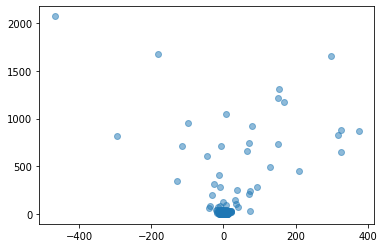

In [153]:
# Task 6 Additional
# Посмотреть корреляцию количества твитов и суммы оценки сентимента (чем больше твитов, тем легче набрать дофига)
# Посмотреть авторов с самой большой позитивной и отрицательной оценкой сентиментов (топ-5)

df2 = pd.DataFrame(df.groupby(['author_name']).agg('sentiment_score').sum().sort_values()) \
    .join(df.author_name.value_counts())
df2.columns = ['sentiment_score', 'sum_tweets']
df2.index.names = ['index']
plt.scatter(df2.sentiment_score, df2.sum_tweets, alpha=0.5)


In [154]:
df2[(df2.sum_tweets > 5) & (df2.sum_tweets < 100)]['sentiment_score'].sort_values()

index
Dune Quotes          -40
Fateh Singh          -38
P. D. Mangan 🇺🇸      -20
Jose Rosado 🔥🔥🔥      -19
Agent 888            -18
                      ..
Podcast Notes         21
Vita                  21
Naval Ravikant Bot    22
Gumroad               39
Max Panzer            74
Name: sentiment_score, Length: 222, dtype: int64

In [155]:
df[df['author_name'] == 'Max Panzer'].head()

,author_name,created_at,handle,likes,retweets,tweet_content,words,sentiment_score
19639,Max Panzer,2019-04-24 10:00:42,becomingaforce,65,12,Bring on the day.\n\nLife is for the living.\n...,"[Bring, on, the, day, , , Life, is, for, the, ...",1
25646,Max Panzer,2019-09-13 22:12:39,becomingaforce,143,22,Go Minimalist and Sovereign...\n\n- save and i...,"[Go, Minimalist, and, Sovereign, , , , , -, sa...",0
25708,Max Panzer,2019-09-10 13:45:59,becomingaforce,341,62,"Choose hard, choose discomfort...\n\n- quit al...","[Choose, hard, , choose, discomfort, , , , , -...",-1
25711,Max Panzer,2019-09-10 10:28:14,becomingaforce,146,28,Forget about the past.\n\nForget about the fut...,"[Forget, about, the, past, , , Forget, about, ...",7
25751,Max Panzer,2019-09-09 12:32:13,becomingaforce,593,119,Do the OPPOSITE of what the masses are doing.....,"[Do, the, OPPOSITE, of, what, the, mass, are, ...",0


In [156]:
df[df['author_name'] == 'Fateh Singh'].head()

,author_name,created_at,handle,likes,retweets,tweet_content,words,sentiment_score
1599,Fateh Singh,2019-09-20 16:49:00,fatehshernu,55,6,1. Happiness with Activity\n\n2. Tranquility w...,"[1, , Happiness, with, Activity, , 2, , Tranqu...",0
1607,Fateh Singh,2019-09-20 11:11:29,fatehshernu,139,34,How to be a Wishy Washy Loser :\n\n1. Avoid ta...,"[How, to, be, a, Wishy, Washy, Loser, , , , 1,...",-2
1608,Fateh Singh,2019-09-19 05:03:15,fatehshernu,862,175,Doing ONE THING AT A TIME is by far THE Greate...,"[Doing, ONE, THING, AT, A, TIME, is, by, far, ...",0
1686,Fateh Singh,2019-09-18 04:19:01,fatehshernu,194,39,If you can't have a Heart to Heart with your '...,"[If, you, can't, have, a, Heart, to, Heart, wi...",0
1687,Fateh Singh,2019-09-18 15:53:03,fatehshernu,685,152,- You're not tired \nYou're unhappy \n\n- You'...,"[-, You're, not, tired, , You're, unhappy, , ,...",-3
